In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = '../resData/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_excel('../resData/시도별_전출입_인구수.xlsx', engine='openpyxl', header=0)
df = df.ffill()

In [34]:
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [28]:
col_years = list(map(str, range(2010, 2018)))
print(col_years)
df4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [32]:
""" 앞에서 적용한 연도 사이에 이동한 인구수를 각 도 별로 합산하여 새로운 열을 추가한다. """
df4['합계'] = df4.sum(axis=1)
print(df4)

       2010   2011   2012   2013   2014   2015   2016   2017      합계
전입지                                                                 
충청남도  24522  24723  22269  21486  21473  22299  21741  21020  718132
경상북도  16042  15818  15191  14420  14456  15113  14236  12464  470960
강원도   22736  23624  22332  20601  21173  22659  21590  21016  702924
전라남도  16429  15974  14765  14187  14591  14598  13065  12426  464140


In [33]:
""" 새롭게 생성한 '합계' 열을 오름차순으로 정렬하여 변수에 저장한다. """
df_total = df4[['합계']].sort_values(by='합계', ascending=True)
print(df_total)

          합계
전입지         
전라남도  464140
경상북도  470960
강원도   702924
충청남도  718132


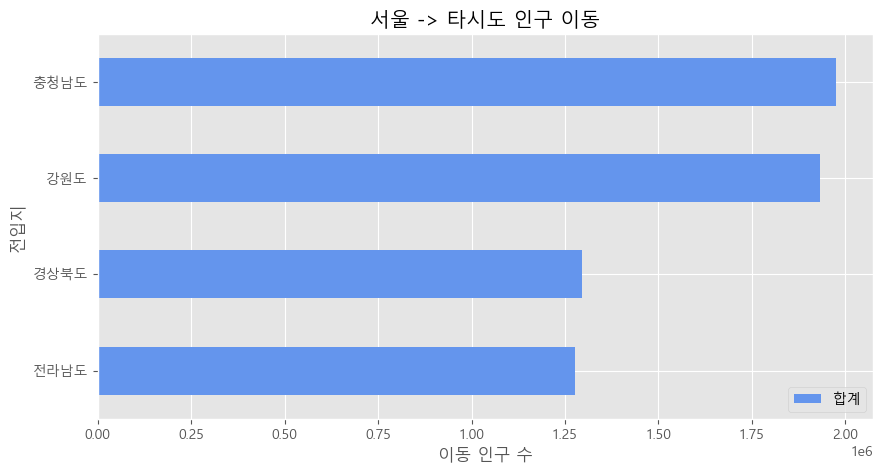

In [25]:
plt.style.use('ggplot')
# 수평 형태의 막대그래프(kind='barh')
df_total.plot(kind='barh', figsize=(10,5), width=0.5, color='cornflowerblue')

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()